<a href="https://colab.research.google.com/github/Afnaan-Alqadree/ai-ml-projects/blob/main/Final_Data_Mining_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

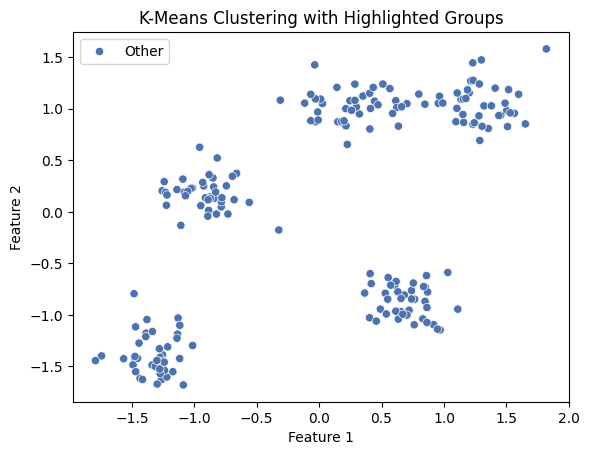

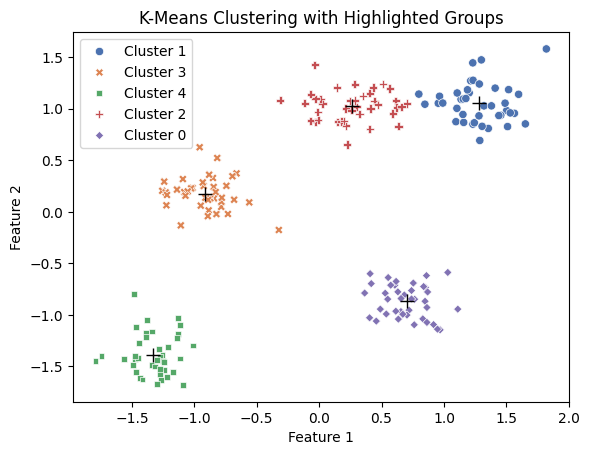

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import seaborn as sns
import random

# Euclidean distance function
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeansInteractive:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = []
        self.classification = []  # To store final classifications

    def fit(self, X_train):
        np.random.seed(100);
        self.centroids = X_train[np.random.choice(X_train.shape[0], self.n_clusters, replace=False)]

        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            prev_centroids = self.centroids

            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            self.centroids = [np.mean(cluster, axis=0) if len(cluster) > 0 else prev_centroids[i]
                              for i, cluster in enumerate(sorted_points)]
            iteration += 1

        # Final classification
        self.classification = []
        for x in X_train:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            self.classification.append(centroid_idx)

    def plot_clusters(self, X_train, true_labels, highlight_groups):
        """
        Plot the clusters, highlighting specific groups if specified.
        - `highlight_groups`: A list of groups (e.g., [0, 2]) to highlight.
        """

        # Highlight specific groups
        highlight_labels = ['Other'] * len(true_labels)
        for group in highlight_groups:
            for i, label in enumerate(self.classification):
                if label == group:
                    highlight_labels[i] = f"Cluster {label}"

        sns.scatterplot(x=[X[0] for X in X_train],
                        y=[X[1] for X in X_train],
                        hue=highlight_labels,
                        style=highlight_labels,
                        palette="deep",
                        legend="full")

        # Plot centroids for highlighted clusters
        for group in highlight_groups:
            plt.plot([self.centroids[group][0]],
                      [self.centroids[group][1]],
                      'k+',
                      markersize=10)

        plt.title("K-Means Clustering with Highlighted Groups")
        plt.legend()
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

# Generate synthetic dataset
centers = 5  # Number of clusters
X_train, true_labels = make_blobs(n_samples=200, centers=centers, random_state=100)
X_train = StandardScaler().fit_transform(X_train)

# Train K-Means
kmeans = KMeansInteractive(n_clusters=centers)
kmeans.fit(X_train)

kmeans.plot_clusters(X_train, true_labels, highlight_groups=[]) # All Blue
kmeans.plot_clusters(X_train, true_labels, highlight_groups=[0, 1, 2, 3, 4]) # First and Second Cluster and Centroid with Color, the rest are blue